本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


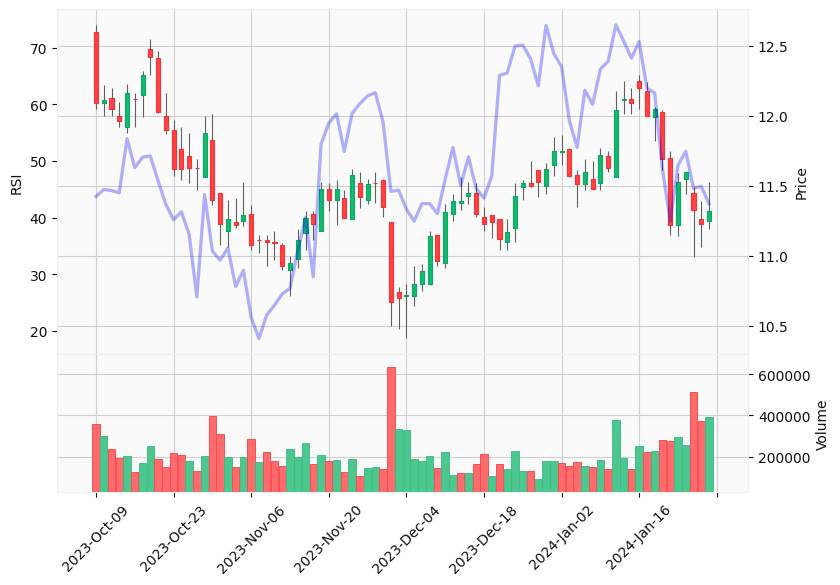

In [13]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import tushare as ts
from datetime import datetime

# 获取股票数据
df = ts.get_hist_data("601058", start="2023-09-01", end="2024-01-29") \
       .sort_values(by="date", ascending=True)
df.index = pd.to_datetime(df.index)

# 这里其实有一个问题 没有考虑到volume 我觉得rsi用处并不大

# 计算RSI
# period 一般为6 or 14天
def calculate_rsi(data: pd.DataFrame, column_name='close', period=14):
    close_prices = data[column_name]
    # 获得时间序列的差分
    # 如果 close_prices 是 [10, 12, 8, 15]，那么 close_prices.diff() 将返回 [NaN, 2, -4, 7]，其中 NaN 表示缺失值
    delta = close_prices.diff()
    # 如果元素大于 0，则保留原值，否则替换为 0
    gain = delta.where(delta > 0, other=0)
    loss = -delta.where(delta < 0, other=0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    # rs = avg_gain / avg_loss
    # rsi = 100 - (100 / (1 + rs))
    rsi = (avg_gain / (avg_loss + avg_gain)) * 100

    return rsi

# 计算RSI并添加到DataFrame中
df['rsi'] = calculate_rsi(df)

# 选取数据范围
df = df[df.index > datetime(year=2023, month=10, day=1)]

# 创建addplot的列表
apdict = [
    # 从上向下 panel从0开始
    mpf.make_addplot(df['rsi'], panel=0, color='blue', alpha=0.3, ylabel='RSI')  # 添加RSI到右侧的y轴
]

# 创建一个subplot，用于绘制蜡烛图
fig, axlist = mpf.plot(
    df,
    type='candle',
    style="yahoo",
    volume=True,
    figscale=1.2,    # 扩大图像大小
    addplot=apdict,  # 增加格外的plot
    show_nontrading=False,
    returnfig=True,
)

# 显示图表
mpf.show()
